In [1]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt

In [2]:
filename = 'AMZN.xls'
AMZN = xlrd.open_workbook(filename)    
table = AMZN.sheet_by_index(0)         
table.row_values(0)                  

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [3]:
date_list = table.col_values(0)      # get every columns from sheet
open_value = table.col_values(1)
high_value = table.col_values(2)
low_value = table.col_values(3)
close_value = table.col_values(4)
adj_close_value = table.col_values(5)     
volume_number = table.col_values(6)

In [4]:
date = []         # build list of every attritubes then append data to these lists
open = []
high =[]
low = []
close = []
adj_close = []
volume = []
daily_return = []
for i in range(2,len(adj_close_value)):
    datetime = xlrd.xldate.xldate_as_datetime(date_list[i], AMZN.datemode)       # get datetime 
    date.append(datetime)
    open.append(open_value[i])
    high.append(high_value[i])
    low.append(low_value[i])
    adj_close.append(adj_close_value[i])
    volume.append(volume_number[i])
    return_daily = (adj_close_value[i]-adj_close_value[i-1])/adj_close_value[i-1]
    daily_return.append(return_daily)
df = pd.DataFrame()  

In [5]:
df['date'] = date                       # append lists to dataframe 
df['open'] = open
df['open'] = df['open'].round(2)
df['high'] = high
df['high'] = df['high'].round(2)
df['low'] = low
df['low'] = df['low'].round(2)
df['adj_close'] = adj_close
df['adj_close'] = df['adj_close'].round(2)
df['volume'] = volume
df['daily return'] = daily_return
df['daily return'] = df['daily return'].apply(lambda x: format(x, '.2%'))
df

,date,open,high,low,adj_close,volume,daily return
0,2019-01-29,1631.27,1632.38,1590.72,1593.88,4632800.0,-2.69%
1,2019-01-30,1623.00,1676.95,1619.68,1670.43,5783800.0,4.80%
2,2019-01-31,1692.85,1736.41,1679.08,1718.73,10910300.0,2.89%
3,2019-02-01,1638.88,1673.06,1622.01,1626.23,11506200.0,-5.38%
4,2019-02-04,1623.00,1649.63,1613.50,1633.31,4929100.0,0.44%
...,...,...,...,...,...,...,...
246,2020-01-21,1865.00,1894.27,1860.00,1892.00,3707800.0,1.46%
247,2020-01-22,1896.09,1902.50,1883.34,1887.46,3216300.0,-0.24%
248,2020-01-23,1885.11,1889.98,1872.76,1884.58,2484600.0,-0.15%
249,2020-01-24,1891.37,1894.99,1847.44,1861.64,3766200.0,-1.22%


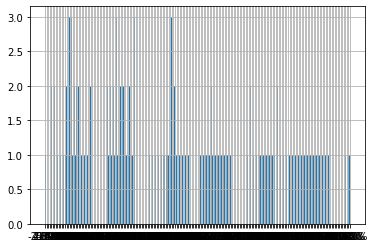

In [6]:
hist = df['daily return'].hist(bins=500)         